# Data and BI Engineer Case Study

## Introduction
In this notebook, we will answer the various questions asked as part of the technical test. The test is divided into three main sections: **Programming basics**, **Supply Chain logic and Optimization**, and **Data Analysis and Visualization**. Each section corresponds to a specific sheet in the Excel file provided, which is loaded at the very beginning of this notebook.

## 1. Loading libraries

In [127]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 2. Loading data

In [155]:
excel_name = "HF_DataBI_Engineer_Case_Study_Data.xlsx"
section_a = pd.read_excel(excel_name, sheet_name='SectionA')
section_b_1 = pd.read_excel(excel_name, sheet_name='SectionB_1')
section_b_2 = pd.read_excel(excel_name, sheet_name='SectionB_2')
section_b_3 = pd.read_excel(excel_name, sheet_name='SectionB_3')
section_c_1 = pd.read_excel(excel_name, sheet_name='SectionC_1')
section_c_2 = pd.read_excel(excel_name, sheet_name='SectionC_2')
section_c_3 = pd.read_excel(excel_name, sheet_name='SectionC_3')

## 3. Section A – Programming basics

**Question 1 :** How many meals (column “meals”) correspond to meal_code == 208?

In [23]:
total_meals = section_a.loc[(section_a['meal_code'] == 208), 'meals'].sum()
print(f"There are {total_meals} meals corresponding to the meal_code == 208.")

There are 9563 meals corresponding to the meal_code == 208.


**Question 2 :** What are the top 3 “meal_code” based on the number of meals (column “meals”) and how many meals for each of those three?

In [56]:
top_3_code = section_a.groupby('meal_code').sum().sort_values(by='meals', ascending=False).head(3)
print("Here are the top 3 'meal_code' with their corresponding meals:")
display(top_3_code)

Here are the top 3 'meal_code' with their corresponding meals:


,meals
meal_code,
203,24897
201,23950
202,20085


**Question 3 :** Please answer the same question as above but this time in SQL. (This will be the only
question in SQL, the following question should be answered in Python)

In [63]:
conn = sqlite3.connect(':memory:')
section_a.to_sql('SectionA', conn, index=False, if_exists='replace')

query_q1 = """
SELECT meal_code, SUM(meals) as total_meals
FROM SectionA
WHERE meal_code == 208
"""

total_meals_sql = pd.read_sql_query(query_q1, conn)

print(f"There are {total_meals} meals corresponding to the meal_code == 208. (SQL Version)")

conn.close()

There are 9563 meals corresponding to the meal_code == 208. (SQL Version)


In [65]:
conn = sqlite3.connect(':memory:')
section_a.to_sql('SectionA', conn, index=False, if_exists='replace')

query_q2 = """
SELECT meal_code, SUM(meals) as total_meals
FROM SectionA
GROUP BY meal_code
ORDER BY total_meals DESC
LIMIT 3
"""

top_3_code_sql = pd.read_sql_query(query_q2, conn)

print("Top 3 meal_code based on the number of meals (SQL Version):")
print(top_3_code_sql)

conn.close()

Top 3 meal_code based on the number of meals (SQL):
   meal_code  total_meals
0        203        24897
1        201        23950
2        202        20085


Question 4 : Please visualize the top 10 “meal_code” based on the number of meals in column
“meals”?

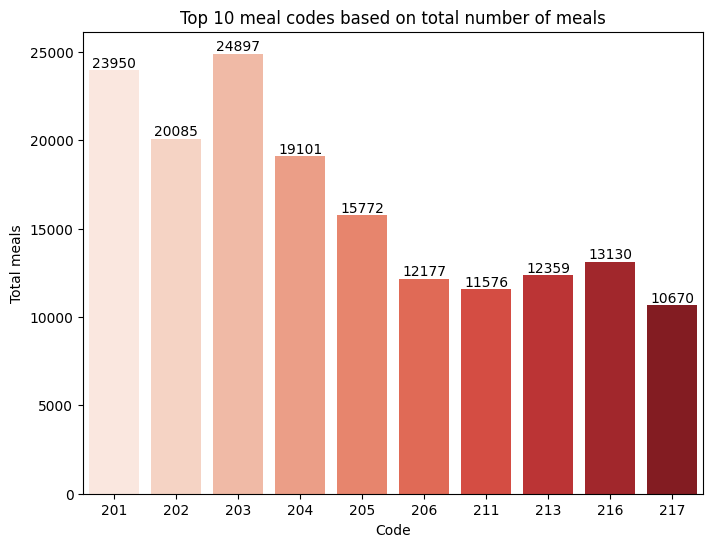

In [87]:
top_10_code = section_a.groupby('meal_code').sum().sort_values(by='meals', ascending=False).head(10)
top_10_code = top_10_code.reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='meal_code', y='meals', data=top_10_code, palette='Reds')
ax.bar_label(ax.containers[0])

plt.xlabel('Code')
plt.ylabel('Total meals')
plt.title('Top 10 meal codes based on total number of meals')
plt.show()

Question 5 : Please add a new column named (meals_new) which adds 20% of meals if meal_code is 201, otherwise it adds 10% to the other meal_code meals. The new column should be rounded to the nearest integer and stored as an integer. Save the table in a variable and print the first 6 lines

In [103]:
section_a['meals_new'] = section_a['meals'] * 1.10

section_a['meals_new'] = section_a['meals_new'].where(
    ~(section_a['meal_code'] == (201)),
    section_a['meals'] * 1.20
)

section_a['meals_new'] = section_a['meals_new'].round().astype(int)

display(section_a.head(6))

,meal_code,meals,meals_new
0,201,4193,5032
1,201,2322,2786
2,201,1019,1223
3,202,3449,3794
4,202,1901,2091
5,202,923,1015


Question 6 : Create a dictionary with the keys being meal_code and the values being a list with two
elements, average meals (as integer value) and maximum meals. Use values from the meals_new
column that you created above. Please print the dictionary (example: dict = {201:[1916,5032],
202…})

In [116]:
mean_max_table = section_a.groupby('meal_code')['meals_new'].agg(['mean', 'max']).reset_index()

mean_max_table['mean'] = mean_max_table['mean'].round().astype(int)

result_dict = mean_max_table.set_index('meal_code').to_dict(orient='index')
result_dict = {k: [v['mean'], v['max']] for k, v in result_dict.items()}

print(result_dict)

{201: [1916, 5032], 202: [1473, 3794], 203: [1826, 5423], 204: [1401, 3929], 205: [1157, 2849], 206: [893, 1872], 207: [770, 2021], 208: [701, 2142], 209: [622, 1643], 210: [274, 710], 211: [849, 2191], 212: [726, 1953], 213: [906, 2311], 214: [466, 1248], 215: [545, 1378], 216: [963, 2482], 217: [782, 2046], 218: [148, 290], 221: [154, 345], 222: [104, 221], 223: [76, 195]}


Question 7 : Please copy the dictionary above and store it in a new variable. Add minimum meals_new element to the list of each meal_code in the dictionary. Please print key 201 from previous dictionary as well as from this new dictionary

In [120]:
from copy import deepcopy

new_dict = deepcopy(result_dict)
for meal_code in new_dict:
    min_value = section_a.loc[(section_a['meal_code'] == meal_code), 'meals_new'].min()
    new_dict[meal_code].append(int(min_value))

print(f"Previous dictionary for key 201: {result_dict.get(201)}")
print(f"New dictionary for key 201: {new_dict.get(201)}")


Previous dictionary for key 201: [1916, 5032]
New dictionary for key 201: [1916, 5032, 432]


## 4. SectionB – Supply Chain logic and Optimization

SectionB contains three separate sheets in the excel file.
- SectionB_1 contains boxes to produce. It contains the size and the weight of each box and in which
agency it should be shipped to
- SectionB_2 is a reference table of agencies and at what time it closes
- SectionB_3 is a reference table of the dimension of each box size

Each box produced needs to be packed in a pallet then pallets are loaded to trucks. Our pallet’s dimensions are as followed:
>- pallet_length_cm = 100
>- pallet_width_cm = 60


In [131]:
display(section_b_1.head(3))
display(section_b_2.head(3))
display(section_b_3.head(3))

,box_id,box_size,weight(kg),agency_code
0,FR0001,S,4.09,A
1,FR0002,S,5.71,B
2,FR0003,S,4.08,C


,agency_code,closed_at
0,A,19:00:00
1,B,10:00:00
2,C,23:00:00


,box_size,height(cm),length(cm),width(cm),volume(m3)
0,S,10,50,20,100
1,M,20,50,20,200
2,L,25,50,20,250


Question 8 : Please add two new columns named “pallet_order” and “box_order”.
- “pallet_order” should contain the order in which the pallet must be produced
- “box_order” should contain the order in which the box must be produced per pallet.

For this case, pallets cannot exceed 50 cm in height and trucks can only contain 2 pallets.
How many pallets do we have? How many trucks do we need?


In [143]:
# Calculate the volume of each box
new_section_b_13 = section_b_1.merge(section_b_3, on='box_size')
new_section_b_13['box_volume'] = new_section_b_13['height(cm)'] * new_section_b_13['length(cm)'] * new_section_b_13['width(cm)']

# Calculate the total volume of all boxes
total_volume = new_section_b_13['box_volume'].sum()

# Calculate the volume of a pallet
pallet_volume = 100 * 60 * 50

# Calculate the number of pallets needed
num_pallets = np.ceil(total_volume / pallet_volume)

# Calculate the number of trucks needed
num_trucks = np.ceil(num_pallets / 2)

# Add the "pallet_order" and "box_order" columns
new_section_b_13['pallet_order'] = (new_section_b_13.index // 30) + 1
new_section_b_13['box_order'] = (new_section_b_13.index % 30) + 1
new_section_b_13

,box_id,box_size,weight(kg),agency_code,height(cm),length(cm),width(cm),volume(m3),box_volume,pallet_order,box_order
0,FR0001,S,4.09,A,10,50,20,100,10000,1,1
1,FR0002,S,5.71,B,10,50,20,100,10000,1,2
2,FR0003,S,4.08,C,10,50,20,100,10000,1,3
3,FR0004,L,8.62,D,25,50,20,250,25000,1,4
4,FR0005,L,7.88,D,25,50,20,250,25000,1,5
...,...,...,...,...,...,...,...,...,...,...,...
95,FR0096,M,6.91,D,20,50,20,200,20000,4,6
96,FR0097,S,5.10,D,10,50,20,100,10000,4,7
97,FR0098,M,8.59,A,20,50,20,200,20000,4,8
98,FR0099,S,3.51,B,10,50,20,100,10000,4,9


In [156]:
pallet_max_height_cm = 50

# Add dimensions and volume to section_b_1
section_b_1 = section_b_1.merge(section_b_3, left_on='box_size', right_on='box_size', how='left')
section_b_1['volume'] = section_b_1['length(cm)'] * section_b_1['width(cm)'] * section_b_1['height(cm)'] / 1_000_000
# Sort boxes by volume (largest volume first)
section_b_1_sorted = section_b_1.sort_values(by='volume', ascending=False).reset_index(drop=True)

# Calculate the cumulative height of the boxes for each pallet and identify the pallet number for each box
section_b_1_sorted['cumulative_height'] = section_b_1_sorted['height(cm)'].cumsum()
section_b_1_sorted['pallet_order'] = (section_b_1_sorted['cumulative_height'] / pallet_max_height_cm).astype(int)

# Add the order of boxes on each pallet and total number of pallets
section_b_1_sorted['box_order'] = section_b_1_sorted.groupby('pallet_order').cumcount()
total_pallets = section_b_1_sorted['pallet_order'].max() + 1

# Determine the number of trucks required (max. 2 pallets/trucks)
total_trucks = (total_pallets + 1) // 2

print("Total number of pallets:", total_pallets)
print("Total number of trucks needed:", total_trucks)
display(section_b_1_sorted[['box_id', 'pallet_order', 'box_order']].head(6))


Total number of pallets: 38
Total number of trucks needed: 19


,box_id,pallet_order,box_order
0,FR0004,0,0
1,FR0011,1,0
2,FR0010,1,1
3,FR0005,2,0
4,FR0029,2,1
5,FR0033,3,0


In [161]:

def calculate_trucks_needed(section_b_1, section_b_3, pallet_max_height_cm):
    """
    Calculate the number of trucks needed based on pallet height.
    """
    
    section_b_1 = section_b_1.merge(section_b_3, left_on='box_size', right_on='box_size', how='left')
    section_b_1['volume'] = section_b_1['length(cm)'] * section_b_1['width(cm)'] * section_b_1['height(cm)'] / 1_000_000
    section_b_1_sorted = section_b_1.sort_values(by='volume', ascending=False).reset_index(drop=True)

    section_b_1_sorted['cumulative_height'] = section_b_1_sorted['height(cm)'].cumsum()
    section_b_1_sorted['pallet_order'] = (section_b_1_sorted['cumulative_height'] / pallet_max_height_cm).astype(int)

    section_b_1_sorted['box_order'] = section_b_1_sorted.groupby('pallet_order').cumcount()
    total_pallets = section_b_1_sorted['pallet_order'].max() + 1

    total_trucks = (total_pallets + 1) // 2
    return total_trucks, section_b_1_sorted

new_section_b_1 = pd.read_excel(excel_name, sheet_name='SectionB_1')
new_section_b_3 = pd.read_excel(excel_name, sheet_name='SectionB_3')

pallet_max_height_cm = 60  # Example if we increase pallet max hieght
total_trucks, section_b_1_sorted = calculate_trucks_needed(new_section_b_1, new_section_b_3, pallet_max_height_cm)

print("Total number of trucks needed:", total_trucks)

Total number of trucks needed: 16


# 5. SectionC – Data Analysis and Visualization
SectionC contains three separate sheets in the excel file
- SectionC_1 contain meal_code, and quantity of sales and price over 4 distinct weeks
- SectionC_2 is a reference table of which ingredients are in which meal_code
- SectionC_3 contain cost and supplier information for each ingredient

In [163]:
display(section_c_1.head(3))
display(section_c_2.head(3))
display(section_c_3.head(3))

,meal_code,week,sales(QTY),sales_price(euros)
0,201,1,75,10
1,202,1,140,10
2,203,1,203,10


,meal_code,ingredients
0,201,Tomato
1,201,Mozarella
2,202,Pasta


,ingredients,supplier,cost_per_meal(euros)
0,Avocado,Supplier1,3.7
1,Bread,Supplier2,1.2
2,Chicken,Supplier3,4.5


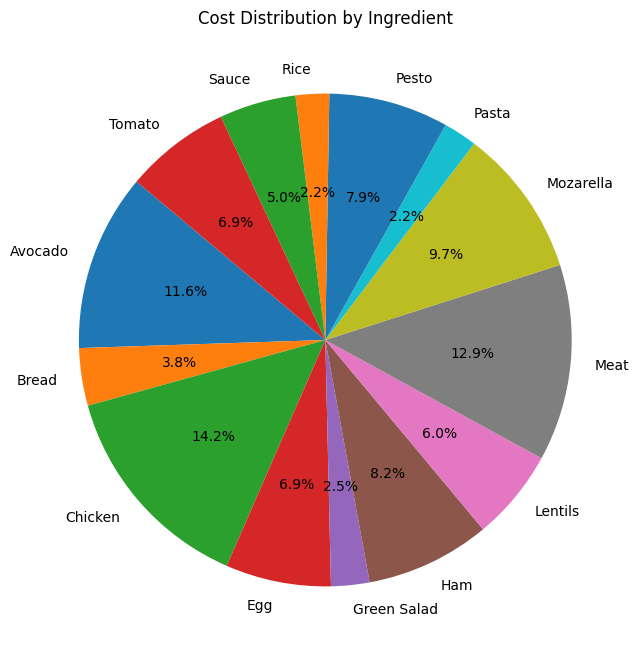

In [175]:
# Simple chart for ingredient cost distribution
ingredient_costs = section_c_3.groupby('ingredients')['cost_per_meal(euros)'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(ingredient_costs['cost_per_meal(euros)'], labels=ingredient_costs['ingredients'], autopct='%1.1f%%', startangle=140)
plt.title('Cost Distribution by Ingredient')
plt.show()

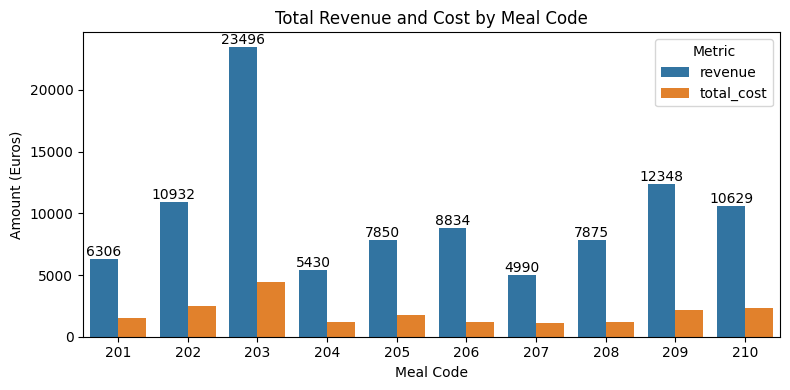

In [173]:
# Merge data
merged_data = pd.merge(section_c_1, section_c_2, on='meal_code')
merged_data = pd.merge(merged_data, section_c_3, on='ingredients')

# Calculate revenue and cost per meal
merged_data['revenue'] = merged_data['sales(QTY)'] * merged_data['sales_price(euros)']
merged_data['cost'] = merged_data['sales(QTY)'] * merged_data['cost_per_meal(euros)']
total_costs = merged_data.groupby('meal_code')['cost'].sum().reset_index(name='total_cost')
revenues = merged_data.groupby('meal_code')['revenue'].sum().reset_index()

# Merge revenue and cost data
final_data = pd.merge(revenues, total_costs, on='meal_code')
final_data['profit'] = final_data['revenue'] - final_data['total_cost']

# Visualization
plt.figure(figsize=(8, 4))

# Bar chart for revenue and total cost
ax = sns.barplot(x='meal_code', y='value', hue='variable', 
            data=pd.melt(final_data[['meal_code', 'revenue', 'total_cost']], id_vars=['meal_code']))
ax.bar_label(ax.containers[0])

plt.title('Total Revenue and Cost by Meal Code')
plt.xlabel('Meal Code')
plt.ylabel('Amount (Euros)')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()